# Final Project - Scientific Programming with Python 

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install pydotplus
!pip install numpy
!pip install pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import pydotplus

## Intro to exploration data set reviews && Initial Data Analysis
Data set contains the average review ratings of users for grouped by different categories. The first 3 features in the data set are user attributes while the rest are ratings. The 8th feature is the target class feature, which indicates the last rating given by the user for a museum category location (1-5).

Attribute 1 : Profile Age (how long has the user existed, <5 years, 5-10 years, >10 years)
Attribute 2 : User Gender (male/female/?)
Attribute 3 : User Marital status (Married/Single)
Attribute 4 : Average ratings on churches
Attribute 5 : Average ratings on resorts
Attribute 6 : Average ratings on beaches
Attribute 7 : Average ratings on parks
Attribute 8 : Last User Rating on museum (Target 1/2/3/4/5)
Attribute 9 : Average ratings on malls
Attribute 10 : Average ratings on zoo
Attribute 11 : Average ratings on restaurants
Attribute 12 : Average ratings on pubs/bars
Attribute 13 : Average ratings on local services
Attribute 14 : Average ratings on burger/pizza shops
Attribute 15 : Average ratings on hotels/other lodgings
Attribute 16 : Average ratings on dance clubs
Attribute 17 : Average ratings on swimming pools
Attribute 18 : Average ratings on gyms
Attribute 19 : Average ratings on bakeries
Attribute 20 : Average ratings on beauty & spas
Attribute 21 : Average ratings on cafes
Attribute 22 : Average ratings on view points
Attribute 23 : Average ratings on monuments
Attribute 24 : Average ratings on gardens

First ill open the csv file and start looking to him to see the data,the subject, featuers and if there is some empty featuers, the size of the data set and anything that can help me understand the dataframe.
There are some values that have been missing that i filled with Nan values that will help me to know how to handle them.
after i fill the Nan values with mean value of the the feature because i dont wont to lose accuracy of the data, i check the avrages and saw that the avrage values dosent change.
The data set of reviews of user rates places, we can see that there is categorical featuers and numerical featuers, category 10 is categorical because the values inside are numbers that are represented in string, all the values of the rates from the user is okey they should be between 0 to 5 and they are.

In [2]:
missing_values = ["","?"]
df = pd.read_csv('reviews2.csv', na_values = missing_values)
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21
count,5456.000000,5261.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5166.000000,5455.000000,5456.000000,5250.000000,5426.000000,5382.000000,5374.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.321433,2.489331,2.796886,2.979472,3.351395,2.540795,3.126019,2.832567,2.078339,2.125511,2.188787,0.949349,0.823285,0.968122,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.422826,1.247815,1.309159,1.355012,1.413492,1.111391,1.356802,1.308758,1.249208,1.406542,1.577023,0.974128,0.950666,1.202365,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.000000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,2.000000,1.930000,1.620000,1.800000,1.632500,1.290000,1.190000,1.030000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.900000,2.060000,2.460000,3.000000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.690000,2.740000,4.092500,4.000000,5.000000,3.190000,5.000000,3.540000,2.285000,2.360000,2.737500,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
After i open the csv file i have been notice that there are some missing values, white space and '?' so i made an list thats hold the missing values that i have and i opened again the csv file and replace all the missing values to "NaN".
We can see that that there are missing values at categories - 2,9,11,13,14,15,16,21 whice mean i will have to fill them with values.

SyntaxError: invalid syntax (<ipython-input-5-fc3629325982>, line 1)

In [3]:
featuers = df.columns
print(featuers)
# we can see that we have 24 featuers looks like 3 categorical and 21 numerical.
df.shape
# gets the number of rows and cols in the data frame - we can see that we have (5456 rows,24 columns)

Index(['Profile Age', 'Gender', 'Marital Status', 'Category 1', 'Category 2',
       'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7',
       'Category 8', 'Category 9', 'Category 10', 'Category 11', 'Category 12',
       'Category 13', 'Category 14', 'Category 15', 'Category 16',
       'Category 17', 'Category 18', 'Category 19', 'Category 20',
       'Category 21'],
      dtype='object')


(5456, 24)

In [4]:
df.describe()

# df.info()
# df.count().sort_values()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21
count,5456.000000,5261.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5166.000000,5455.000000,5456.000000,5250.000000,5426.000000,5382.000000,5374.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.321433,2.489331,2.796886,2.979472,3.351395,2.540795,3.126019,2.832567,2.078339,2.125511,2.188787,0.949349,0.823285,0.968122,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.422826,1.247815,1.309159,1.355012,1.413492,1.111391,1.356802,1.308758,1.249208,1.406542,1.577023,0.974128,0.950666,1.202365,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.000000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,2.000000,1.930000,1.620000,1.800000,1.632500,1.290000,1.190000,1.030000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.900000,2.060000,2.460000,3.000000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.690000,2.740000,4.092500,4.000000,5.000000,3.190000,5.000000,3.540000,2.285000,2.360000,2.737500,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
we can see that without include all the info function dosent include category 10 wich means is a category feature. so ill check the feature to see why isnt he numerical.

In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df['Category 10'].unique()


array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', nan, '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.6', '1.59',
       '1.58', '1.99', '2.47', '2.35', '1.61', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.71',
       '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57', '2.55',
       '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76', '1.62',
       '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98', '3.96',
       '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87', '3.86',
       '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83', '2.81', '2.8',
       '2.73', '2.72', '2.67', '2.64', '2.62', '2.52', '2.5', '1.57',
     

In [ ]:
the feature category 10 is a categorical but holding a number in representaion of string, and there is a value of '2/t2' so ill change it to 2.2 as string , and then convert it to numerical feature as it should be, rates of users to place in range of 0 - 5

In [6]:

df['Category 10'] = np.where(df['Category 10'] == '2\t2.', str(2.2), df['Category 10'])
df['Category 10'].unique()
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21
count,5456.000000,5261.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5166.000000,5455.000000,5456.000000,5250.000000,5426.000000,5382.000000,5374.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.321433,2.489331,2.796886,2.979472,3.351395,2.540795,3.126019,2.832567,2.078339,2.125511,2.188787,0.949349,0.823285,0.968122,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.422826,1.247815,1.309159,1.355012,1.413492,1.111391,1.356802,1.308758,1.249208,1.406542,1.577023,0.974128,0.950666,1.202365,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.000000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,2.000000,1.930000,1.620000,1.800000,1.632500,1.290000,1.190000,1.030000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.900000,2.060000,2.460000,3.000000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.690000,2.740000,4.092500,4.000000,5.000000,3.190000,5.000000,3.540000,2.285000,2.360000,2.737500,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
now its represent as string and still not inside the describe because its not numerical yet.

In [7]:
df['Category 10'] = pd.to_numeric(df['Category 10'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21
count,5456.000000,5261.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5166.000000,5238.000000,5455.000000,5456.000000,5250.000000,5426.000000,5382.000000,5374.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.321433,2.489331,2.796886,2.979472,3.351395,2.540795,3.126019,2.832567,2.547805,2.078339,2.125511,2.188787,0.949349,0.823285,0.968122,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.422826,1.247815,1.309159,1.355012,1.413492,1.111391,1.356802,1.308758,1.382265,1.249208,1.406542,1.577023,0.974128,0.950666,1.202365,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.000000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,2.000000,1.930000,1.620000,1.800000,1.632500,1.580000,1.290000,1.190000,1.030000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.900000,2.060000,2.460000,3.000000,3.230000,2.170000,2.800000,2.680000,1.990000,1.690000,1.610000,1.490000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.690000,2.740000,4.092500,4.000000,5.000000,3.190000,5.000000,3.540000,3.210000,2.285000,2.360000,2.737500,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
Now we can see that category 10 shows in the describe function which means that converted to numerical features.(rates of users, should be all nomerical)
In the next step i will  check with boxplot that the values of the features are okey, because thos features represent rates of user to places,it should be values that greater then 0. (each plot for 5 features).
we can see that in all the categories the std and the mean are close whice means that all the values are around the mean value and the distribution is not big.

<AxesSubplot:>

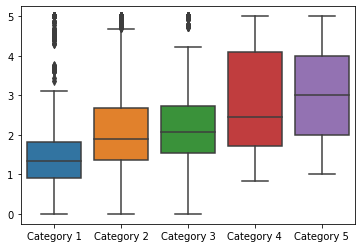

In [8]:
#check if there is rates thats not grater then zero
sns.boxplot(data=df[['Category 1','Category 2','Category 3','Category 4','Category 5']])

<AxesSubplot:>

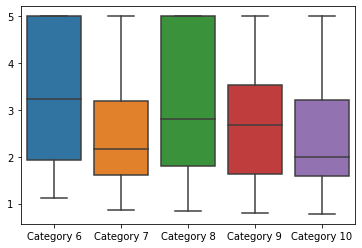

In [9]:
sns.boxplot(data=df[['Category 6','Category 7','Category 8','Category 9','Category 10']])

<AxesSubplot:>

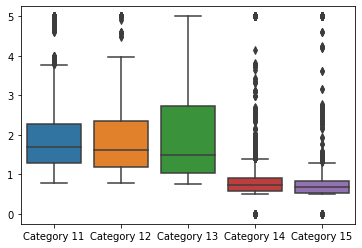

In [10]:
sns.boxplot(data=df[['Category 11','Category 12','Category 13','Category 14','Category 15']])

<AxesSubplot:>

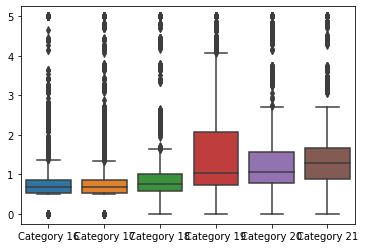

In [11]:
sns.boxplot(data=df[['Category 16','Category 17','Category 18','Category 19','Category 20','Category 21']])

In [ ]:
The plot are describe us that all the value are in the right range they should be, in the range of 0 to 5.
We can see that features 14, 15, 16, 17 are low under 1, and its probably mean that is bad rates.
Now i will rename the columns from category 1 to 21, to their namess it will be easy to understande.

In [12]:
 df.rename(columns={'Category 1': 'Average ratings on churches','Category 2': 'Average ratings on resorts','Category 3':'Average ratings on beaches','Category 4':'Average ratings on parks',
                                    'Category 5':'Last User Rating on museum','Category 6':'Average ratings on malls','Category 7':'Average ratings on zoo','Category 8':'Average ratings on resaurants',
                                    'Category 9':'Average ratings on pubs/bars','Category 10':'Average ratings on local services','Category 11':'Average ratings on burger/pizza shops',
                                    'Category 12':'Average ratings on hotels/other lodgings','Category 13':'Average ratings on dance clubs','Category 14':'Average ratings on swimming pools',
                                    'Category 15':'Average ratings on gyms','Category 16':'Average ratings on bakeries','Category 17':'Average ratings on beauty & spa',
                                    'Category 18':'Average ratings on cafes','Category 19':'Average ratings on view points','Category 20':'Average ratings on monuments','Category 21':'Average ratings on gardens'},inplace=True)
featuers = df.columns
df.head()

,Profile Age,Gender,Marital Status,Average ratings on churches,Average ratings on resorts,Average ratings on beaches,Average ratings on parks,Last User Rating on museum,Average ratings on malls,Average ratings on zoo,Average ratings on resaurants,Average ratings on pubs/bars,Average ratings on local services,Average ratings on burger/pizza shops,Average ratings on hotels/other lodgings,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spa,Average ratings on cafes,Average ratings on view points,Average ratings on monuments,Average ratings on gardens
0,5-10,male,Single,0.0,0.0,3.63,3.65,5,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,5-10,male,Single,0.0,0.0,3.63,3.65,5,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,5-10,female,Single,0.0,0.0,3.63,3.63,5,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,5-10,male,Single,0.0,0.5,3.63,3.63,5,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,5-10,female,Single,0.0,0.0,3.63,3.63,5,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [14]:
# Cleaning null columns from the csv data frame,
# check the categorical featuers if there is null values, if does we check if it effects the data set:
df['Gender'].unique()
df['Profile Age'].unique()
df['Marital Status'].unique()

array(['Single', 'single', nan, 'Married', 'married'], dtype=object)

In [ ]:
I checked the unique values of the categorical features, to see which way i should fill up the missing values.
The feature Gender has 'male','female' and nan.
The featuer Profile Age has '5-10','<5','>5' and nan.
The feature Marital Status has 'Single', 'single', 'nan', 'Married' , 'married' so i will change the values to be 'single' ,'married' and nan.

In [15]:
df['Marital Status'] = np.where(df['Marital Status'] == 'Single', 'single',(np.where(df["Marital Status"] == 'Married','married','nan')))
df['Marital Status']

8     single
4209     single
4210        nan
4211     single
4212     single
4213        nan
4214     single
4215     single
4216        nan
4217     single
4218     single
4219     single
4220     single
4221     single
4222     single
4223     single
4224     single
4225     single
4226     single
4227     single
4228     single
4229     single
4230     single
4231     single
4232     single
4233     single
4234     single
4235     single
4236     single
4237        nan
4238     single
4239     single
4240     single
4241     single
4242     single
4243     single
4244     single
4245     single
4246     single
4247     single
4248     single
4249     single
4250     single
4251     single
4252     single
4253     single
4254     single
4255        nan
4256     single
4257     single
4258     single
4259     single
4260     single
4261     single
4262     single
4263     single
4264     single
4265     single
4266     single
4267     single
4268    married
4269     single
4270     si

In [16]:
df.describe(include = "all")
# i see that the top value in Profile Age is '<5' in Gender is 'female' and in Marital Status is 'single', so ill fill
# the nan values with the top of every feature
df['Profile Age'].fillna('<5',inplace = True)
# df['Profile Age'] 
df['Marital Status'] = np.where(df['Marital Status'] == 'nan','single',df['Marital Status'])
# df['Marital Status']
df['Gender'].fillna('female', inplace = True)
df['Gender']


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Profile Age                               5456 non-null   object 
 1   Gender                                    5456 non-null   object 
 2   Marital Status                            5456 non-null   object 
 3   Average ratings on churches               5456 non-null   float64
 4   Average ratings on resorts                5261 non-null   float64
 5   Average ratings on beaches                5456 non-null   float64
 6   Average ratings on parks                  5456 non-null   float64
 7   Last User Rating on museum                5456 non-null   int64  
 8   Average ratings on malls                  5456 non-null   float64
 9   Average ratings on zoo                    5456 non-null   float64
 10  Average ratings on resaurants       

In [ ]:
Now we can see that the categorical features - Profile age , gender and marital status are full and contains 5456 rows as it should be.
In the next cell need to fill the nan values of the numerical features, and then to check if all the data frame is full without missing values.

In [17]:
df.fillna(df.mean(), inplace=True)
df.info()
df.count().sort_values()
df.describe(include ="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Profile Age                               5456 non-null   object 
 1   Gender                                    5456 non-null   object 
 2   Marital Status                            5456 non-null   object 
 3   Average ratings on churches               5456 non-null   float64
 4   Average ratings on resorts                5456 non-null   float64
 5   Average ratings on beaches                5456 non-null   float64
 6   Average ratings on parks                  5456 non-null   float64
 7   Last User Rating on museum                5456 non-null   int64  
 8   Average ratings on malls                  5456 non-null   float64
 9   Average ratings on zoo                    5456 non-null   float64
 10  Average ratings on resaurants       

,Profile Age,Gender,Marital Status,Average ratings on churches,Average ratings on resorts,Average ratings on beaches,Average ratings on parks,Last User Rating on museum,Average ratings on malls,Average ratings on zoo,Average ratings on resaurants,Average ratings on pubs/bars,Average ratings on local services,Average ratings on burger/pizza shops,Average ratings on hotels/other lodgings,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spa,Average ratings on cafes,Average ratings on view points,Average ratings on monuments,Average ratings on gardens
count,5456,5456,5456,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
unique,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,<5,female,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3115,3034,3103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.455720,2.321433,2.489331,2.796886,2.979472,3.351395,2.540795,3.126019,2.832567,2.547805,2.078339,2.125511,2.188787,0.949349,0.823285,0.968122,1.000071,0.965838,1.750537,1.531453,1.560755
std,NaN,NaN,NaN,0.827604,1.397164,1.247815,1.309159,1.355012,1.413492,1.111391,1.356802,1.273495,1.354363,1.249094,1.406542,1.546960,0.971446,0.944196,1.193294,1.193891,0.929853,1.598734,1.316889,1.171649
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.830000,1.000000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.920000,1.370000,1.540000,1.730000,2.000000,1.930000,1.620000,1.800000,1.660000,1.590000,1.290000,1.190000,1.050000,0.580000,0.530000,0.530000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,NaN,NaN,NaN,1.340000,2.020000,2.060000,2.460000,3.000000,3.230000,2.170000,2.800000,2.750000,2.060000,1.690000,1.610000,1.520000,0.740000,0.690000,0.700000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,NaN,NaN,NaN,1.810000,2.650000,2.740000,4.092500,4.000000,5.000000,3.190000,5.000000,3.340000,3.080000,2.282500,2.360000,2.580000,0.920000,0.830000,0.870000,0.860000,1.000000,2.070000,1.560000,1.660000


In [ ]:
Done with cleaning the data, all the data frame contains all the value that should be.
At first i open the csv file and try to get insights about the data, I have notice that there is missing values - "" and "?" - then convert
them to Nan values.
The next step was to see the shape and the features of the table, i understand that i should change the features names to the names from the explantion document.
Then I have noticed that in the description the category 10 is not included, but the feature looks like numerical, i checked the unique values and the contained values was in represntaion of string and one value of '2/t', then i convert that number to '2.2'
and convert all the feature value to numerical.
The next step was to genrate box plot of 5 features each time to check if the values are outlires the values should be in range of 0 - 5 , as we can see in the plots that all the values are above 0 and below 5, and that are some featuers that rated very low(14,15,16,17).
After that i change the names of the categories to be more easy to understand.
checkd the unique values of the categorical featuers, the marital status was needed a change because it was holding duplicate values.
Filled the nan values in the categorical features with the top value of the the feature, and the numerical features i fill with the mean value of the feature.
At this point the data frame is full with values, with no errors, no outliers values and no missing data.


## Exploratory Data Analysis
### Analyzing the cleaned up data and present my observations.


In [ ]:
First i want to have a look about the features and how users avrage rates of the places for the see the distribut of the featuers.

Text(0.5, 1.0, 'Average rating per Category')

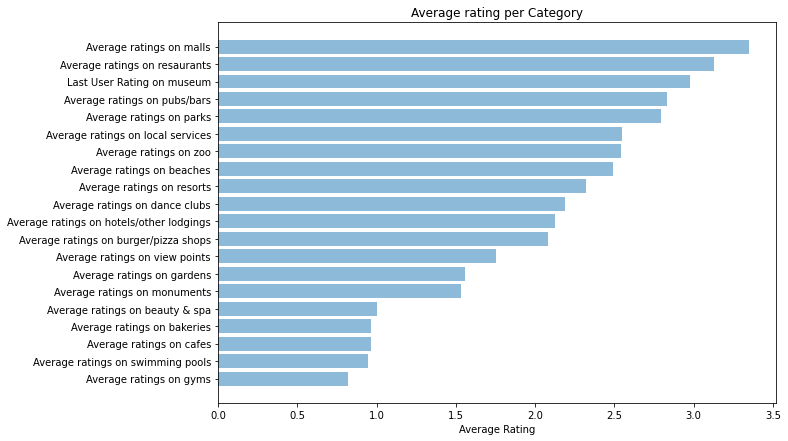

In [18]:
featuers
numericalFeatures = ['Average ratings on churches', 'Average ratings on resorts',
       'Average ratings on beaches', 'Average ratings on parks',
       'Last User Rating on museum', 'Average ratings on malls',
       'Average ratings on zoo', 'Average ratings on resaurants',
       'Average ratings on pubs/bars', 'Average ratings on local services',
       'Average ratings on burger/pizza shops',
       'Average ratings on hotels/other lodgings',
       'Average ratings on dance clubs', 'Average ratings on swimming pools',
       'Average ratings on gyms', 'Average ratings on bakeries',
       'Average ratings on beauty & spa', 'Average ratings on cafes',
       'Average ratings on view points', 'Average ratings on monuments',
       'Average ratings on gardens']

avrageRating = df[numericalFeatures[1:]].mean()
avrageRating = avrageRating.sort_values()
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(numericalFeatures[1:])), avrageRating.values, align='center', alpha=0.5)
plt.yticks(np.arange(len(numericalFeatures[1:])), avrageRating.index)
plt.xlabel('Average Rating')
plt.title('Average rating per Category')

In [ ]:
we can see that the avrage rating on the malls are the highest and the lowest avrage rating is the gyms.
The next step will be to check the correlation of the 

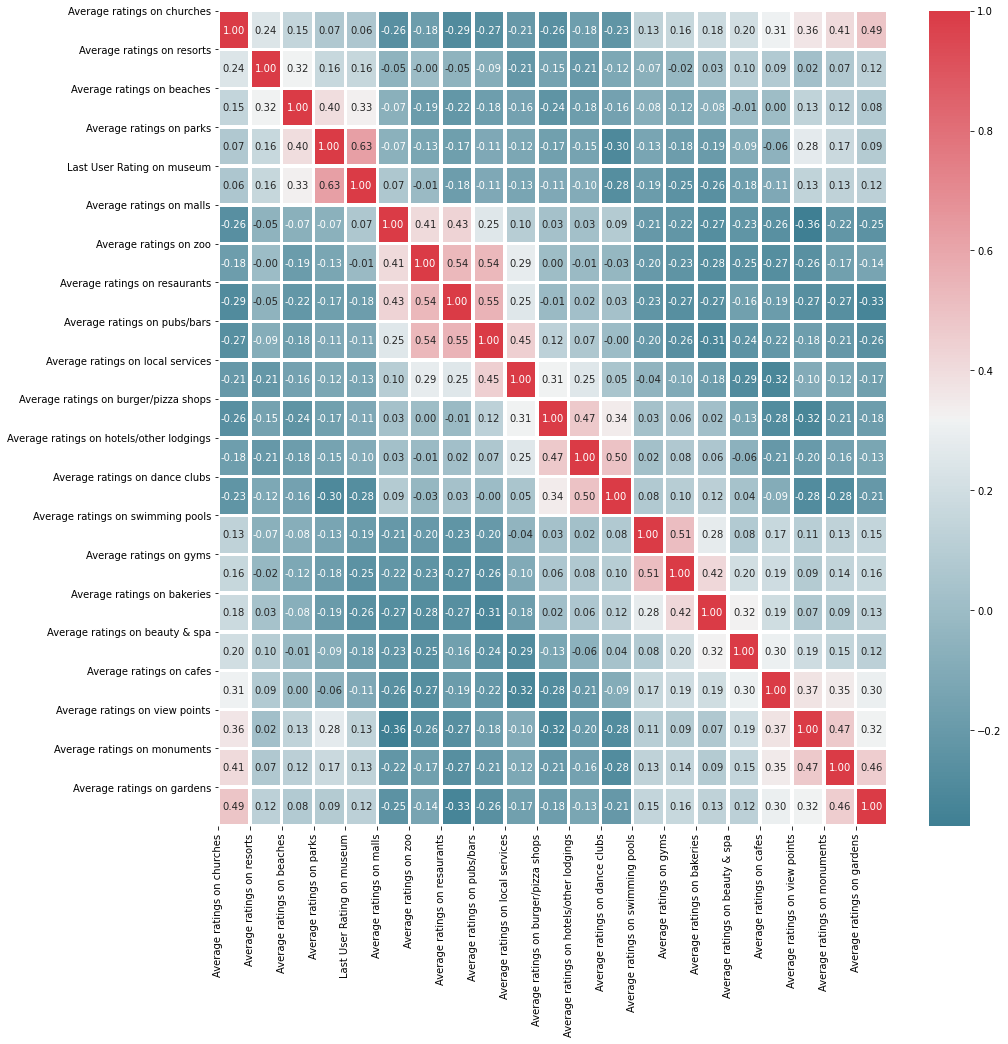

In [35]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", linewidths=2.5)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()